In [1]:
import numpy as np
from scipy.interpolate import lagrange
from numpy.polynomial.polynomial import Polynomial
import matplotlib.pyplot as plt

In [2]:
interval = [0, np.pi*2]
np.random.seed(5)
x = np.random.uniform(interval[0],interval[1],100)
y = np.sin(x)
poly = lagrange(x, y)
polynomial = Polynomial(poly.coef[::-1])

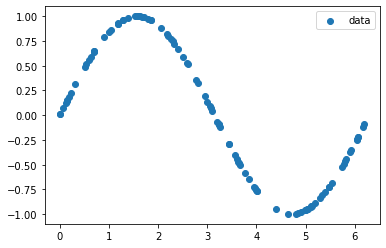

In [3]:
x_new = np.arange(interval[0], interval[1], 0.1)
plt.scatter(x, y, label='data')
##plt.plot(x_new, polynomial(x_new), label='Polynomial')
plt.legend()

In [4]:
def plot(x, y, polynomial, name = 'Lagrange'):
    x_new = np.arange(interval[0], interval[1], 0.1)
    plt.scatter(x, y, label='data')
    plt.plot(x_new, polynomial(x_new), label='Polynomial')
    plt.legend()

In [5]:
def calc_log_MSE(X:np.ndarray, polynomial:Polynomial,  Y:np.ndarray):
    Y_2 = []
    for i in X:
        Y_2.append(polynomial(i))
    error = np.sum((Y_2-Y)**2)
    error = np.log2(error/len(Y))
    return error

In [6]:
test1_x = np.random.uniform(interval[0],interval[1],100)
test1_y = np.sin(test1_x)
test1_err = calc_log_MSE(test1_x, polynomial, test1_y)
train1_err = calc_log_MSE(x, polynomial, y)

In [7]:
train1_err

462.2861514576964

In [8]:
test1_err

465.05741493961057

In [15]:
epsilon_range = np.arange(0,15, 1)
train_err_list = []
test_err_list = []
for epsilon in epsilon_range:
    noise = np.random.normal(0, epsilon, 100)
    #print(noise)
    x_noise = x + noise
    y_noise = np.sin(x_noise)
    poly = lagrange(x_noise, y_noise)
    polynomial = Polynomial(poly.coef[::-1])
    #print(polynomial(1))
    test_err = calc_log_MSE(test1_x, polynomial, test1_y)
    train_err = calc_log_MSE(x_noise, polynomial, y_noise)
    train_err_list.append(train_err)
    test_err_list.append(test_err)
    #plot(x_noise, y_noise, polynomial)
    print("test err = %.4f  train err = %.4f"%(test_err, train_err))


test err = 465.0574  train err = 462.2862
test err = 434.8814  train err = 488.4571
test err = 374.1943  train err = 451.4556
test err = 308.7729  train err = 442.9537
test err = 290.1190  train err = 442.5083
test err = 196.7686  train err = 492.0046
test err = 147.4095  train err = 378.0003
test err = 122.7641  train err = 367.2381
test err = 93.1515  train err = 365.3976
test err = 99.1613  train err = 389.5778
test err = 80.7333  train err = 379.0774
test err = 116.0322  train err = 383.9946
test err = 69.9863  train err = 446.4495
test err = 57.9865  train err = 366.0235
test err = 31.8441  train err = 334.5547


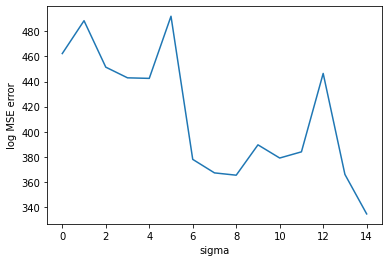

In [21]:
import matplotlib.pyplot as plt

plt.plot(train_err_list)
#plt.xscale('log')
# plt.xticks(epsilon_range)
plt.xlabel('sigma')
plt.ylabel('log MSE error')
plt.savefig("Lag_train_err.pdf")

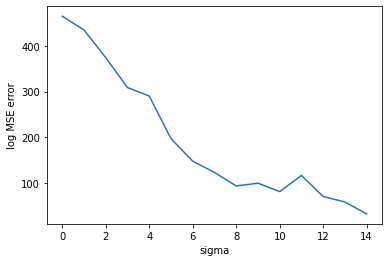

In [20]:
plt.plot(test_err_list)
#plt.xscale('log')
# plt.xticks(epsilon_range)
plt.xlabel('sigma')
plt.ylabel('log MSE error')
plt.savefig("Lag_test_err.pdf")

In [22]:
epsilon_range

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])